<h1 align='center'>iNeuron Internship Project : Adult Census Income Prediction</h1>

<h2 align='center'>Interns : Ritesh  Naik  ||   Darshan Naik </h2>

<img src="https://miro.medium.com/max/1000/1*08ltbgXFxujakJZSJswp1Q.png" width="800" height="400"  align="centre"/>


# importing necessary libraries

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score, classification_report
import pickle
import warnings            
warnings.filterwarnings("ignore")  #This will ignore the warning message if any & will not display after the code block is executed   

# Import the dataset

In [98]:
df = pd.read_csv("/content/adult.csv")
df.head(5)    # To check the initial 5 values

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [99]:
#Lets check the count of data in each column along with datatypes
df.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  country         32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [100]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [101]:
# filling missing values
col_names = df.columns
for c in col_names:
    df[c] = df[c].replace("?", np.NaN)


In [102]:
# df.workclass.value_counts()

In [103]:
df = df.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [104]:
#discretisation
df.replace(['Divorced', 'Married-AF-spouse',
              'Married-civ-spouse', 'Married-spouse-absent',
              'Never-married','Separated','Widowed'],
             ['divorced','married','married','married',
              'not married','not married','not married'], inplace = True)



In [105]:
#label Encoder
category_col =['workclass', 'race', 'education','marital-status', 'occupation','relationship', 'sex', 'country', 'salary']
labelEncoder = preprocessing.LabelEncoder()

# creating a map of all the numerical values of each categorical labels.
mapping_dict={}
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    mapping_dict[col]=le_name_mapping
# print(mapping_dict)

In [106]:
#droping redundant columns
df=df.drop(['fnlwgt','education-num'], axis=1)
df.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,7,9,4,1,1,4,1,2174,0,40,39,0
1,50,6,9,2,4,0,4,1,0,0,13,39,0
2,38,4,11,0,6,1,4,1,0,0,40,39,0
3,53,4,1,2,6,0,2,1,0,0,40,39,0
4,28,4,9,2,10,5,2,0,0,0,40,5,0


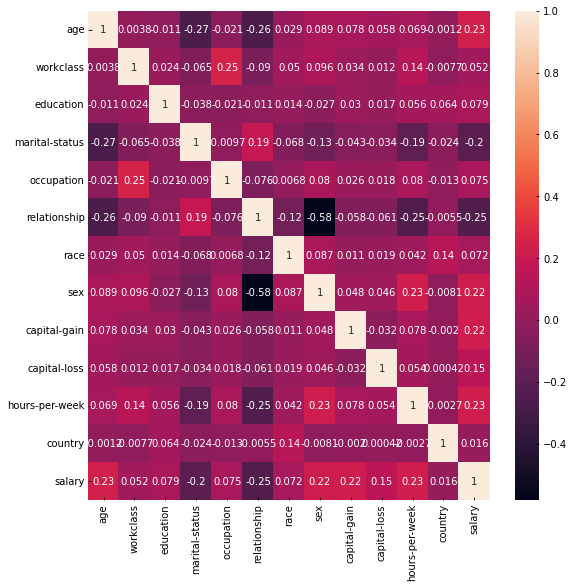

In [107]:
# Lets find out the correlation among the features
# Higher the number, higher the corelation
plt.figure(figsize=[9,9])
sns.heatmap(df.corr(), annot=True)

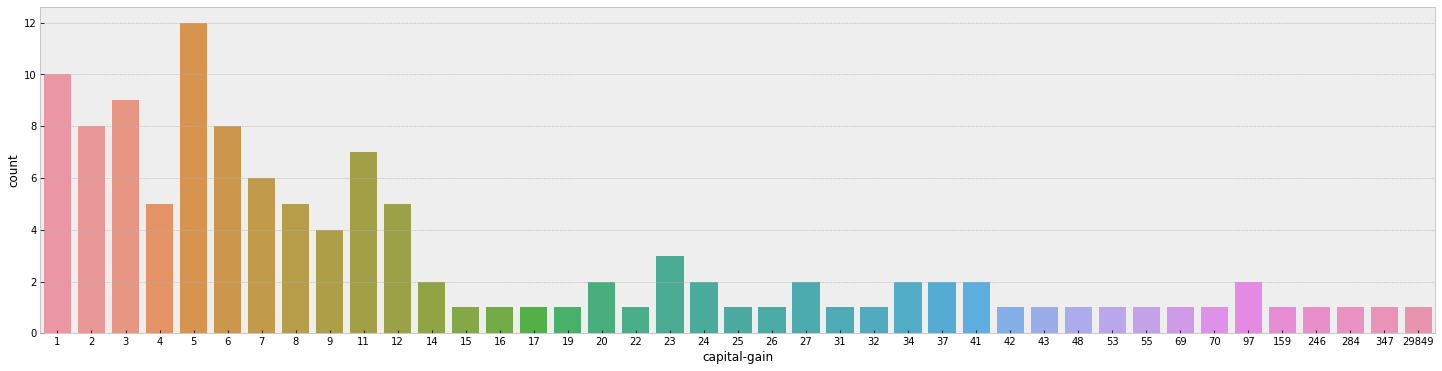

In [108]:
plt.figure(figsize=[25,6])
sns.countplot(df["capital-gain"].value_counts())

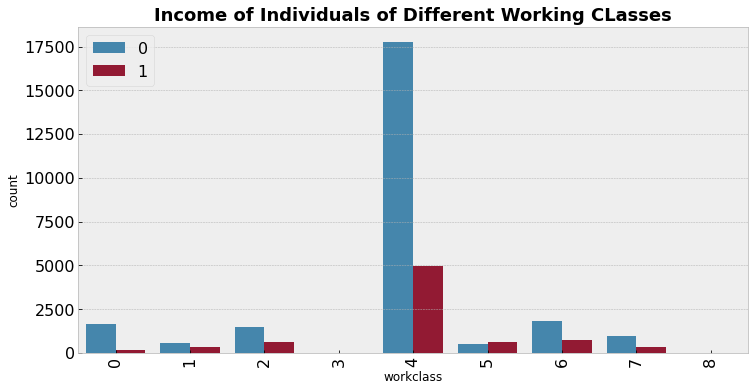

In [109]:
plt.figure(figsize=(12,6))
sns.countplot(df['workclass'], hue = df['salary'], )
plt.title('Income of Individuals of Different Working CLasses', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

#Independent & Dependent Variable

In [110]:
# Lets devide the values
# Remember , its a binary classification
X = df.drop("salary", axis=1)
y = df.salary

# Training & Test Data

In [111]:
# Lets split the data to Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, test_size=0.2, random_state=43 ) 

# Model 1 - Decision Tree

In [112]:
# Lets build Decision Tree classifier
model_1 = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=5, min_samples_leaf=5)
model_1.fit(X_train, y_train)
pred_1 = model_1.predict(X_test)
model_1_accuracy = accuracy_score(y_test,pred_1)*100
model_1_f1 = f1_score(y_test, pred_1)


In [113]:
print ("Desicion Tree using Gini Index \nAccuracy is ", model_1_accuracy )
print("F1 Score is :", model_1_f1)

Desicion Tree using Gini Index 
Accuracy is  83.75556579149394
F1 Score is : 0.5908739365815933


# Model 2 - Random Forest

In [114]:
# Lets build a model using Random forest
from sklearn.ensemble import RandomForestClassifier

In [115]:
model_2 = RandomForestClassifier(n_jobs = -1,)
model_2.fit(X_train,y_train, )
pred_2 = model_2.predict(X_test)

In [116]:
model_2_accuracy = accuracy_score(y_test,pred_2)*100
model_2_f1 = f1_score(y_test, pred_2, average = 'binary')

In [117]:
print("Accuracy of Random forest model is" , model_2_accuracy  )
print ("The f1 score of model : ", model_2_f1)

Accuracy of Random forest model is 85.50591125441424
The f1 score of model :  0.6740331491712708


In [118]:
"""Commenting these out as this dint improve the accuracy of RF model. 
Hence commenting the next block of codes too"""
# import random
# from random import randint
# param = {'max_depth': [6,9, None], 
#          'n_estimators':[50, 70, 100, 150], 
          
#           'criterion' : ['gini', 'entropy'],
#           'bootstrap':[True, False],
#           'min_samples_leaf': [1,10] }

'Commenting these out as this dint improve the accuracy of RF model. \nHence commenting the next block of codes too'

In [119]:
# from sklearn.model_selection import RandomizedSearchCV
# rnd_search = RandomizedSearchCV(RandomForestClassifier(), param, 
# n_iter =10, cv=9)
# rnd_search.fit(X_train,y_train)

In [120]:
# rnd_search.best_params_

In [121]:
# rnd_search.best_score_ 

# Model 3 - XGBoost

In [122]:
# Lets build XGBoost 
import xgboost as xgb
from xgboost import XGBClassifier
boosted_gd = XGBClassifier(learning_rate = 0.35, n_estimator = 500)
model_3 = boosted_gd.fit(X_train, y_train)

# Predictions
pred_3 = model_3.predict(X_test)
model_3_accuracy = accuracy_score(y_test, pred_3)*100
model_3_f1 = f1_score(y_test, pred_3, average = 'binary')

print ("The accuracy of model 4 : ",model_3_accuracy)
print ("The f1 score of model 4 : ", model_3_f1,)

The accuracy of model 4 :  87.48656533087672
The f1 score of model 4 :  0.7104795737122558


In [123]:
# # Lets save the model
pickle.dump(model_3, open("income_model.pkl", "wb"))

# Model 4 - Logistic Regression

In [124]:
# Lets build logistic regression model
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
model_4 = lr_model.fit(X_train, y_train)

# Predictions
pred_4 = model_4.predict(X_test)
model_4_accuracy = accuracy_score(y_test, pred_4)*100
model_4_f1 = f1_score(y_test, pred_4, average = 'binary')

print ("The accuracy of model 4 : ",model_4_accuracy)
print ("The f1 score of model 4 : ", model_4_f1,)

The accuracy of model 4 :  80.13204360509751
The f1 score of model 4 :  0.41711711711711713


In [125]:
model_scores = {"Model_Name":["Decision Tree", "Random Forest", "XGBoost", "Logistic Regression" ], 
                "Accuracy (%)" :[model_1_accuracy, model_2_accuracy, model_3_accuracy, model_4_accuracy], 
                "F1_score" : [model_1_f1,model_2_f1, model_3_f1, model_4_f1 ]}

In [126]:
# Lets stack all the model along with their Accuracy & F1 score
model_table = pd.DataFrame(model_scores)
model_table

,Model_Name,Accuracy (%),F1_score
0,Decision Tree,83.755566,0.590874
1,Random Forest,85.505911,0.674033
2,XGBoost,87.486565,0.710480
3,Logistic Regression,80.132044,0.417117


In [127]:
models = [model_1, model_2, model_3, model_4 ]
model_names = ["Decision Tree", "Random Forest Classifier", "XGBoost", "Logistic Regression" ]


# Lets draw ROC Curve

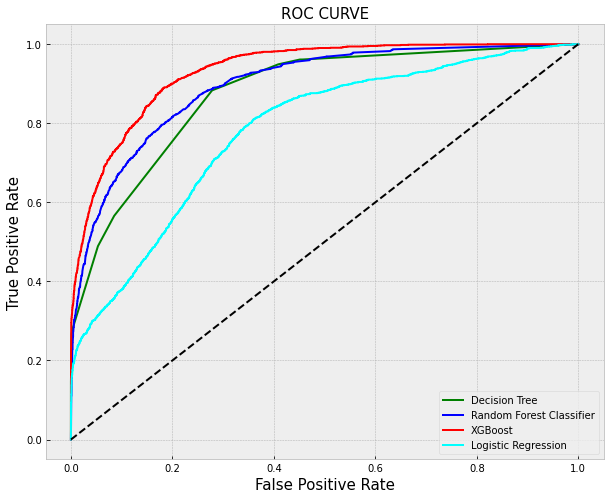

In [128]:
plt.rcParams['figure.figsize'] = [10,8]
plt.style.use("bmh")

color = [ 'green','blue', 'red', 'cyan', 'fuchsia' ]
plt.title("ROC CURVE", fontsize = 15)
plt.xlabel("False Positive Rate", fontsize = 15)
plt.ylabel("True Positive Rate", fontsize = 15)
i = 1

for i, model in enumerate(models) :
    prob = model.predict_proba(X_test)
    prob_positive = prob[:,1]
    fpr, tpr, threshold = roc_curve(y_test, prob_positive)
    plt.plot(fpr, tpr, color = color[i])
    plt.gca().legend(model_names, loc = 'lower right', frameon = True)

plt.plot([0,1],[0,1], linestyle = '--', color = 'black')
plt.show()

In [129]:
# Lets display the confusion matrix of all models
pred_list = [pred_1, pred_2, pred_3, pred_4 ]

for i, predictions in enumerate(pred_list) :
    print ("\n\nClassification Report of ", model_names[i])
    print (classification_report(y_test, predictions, target_names = ["<=50K", ">50K"]))




Classification Report of  Decision Tree
              precision    recall  f1-score   support

       <=50K       0.86      0.95      0.90      4963
        >50K       0.74      0.49      0.59      1550

    accuracy                           0.84      6513
   macro avg       0.80      0.72      0.74      6513
weighted avg       0.83      0.84      0.83      6513



Classification Report of  Random Forest Classifier
              precision    recall  f1-score   support

       <=50K       0.89      0.93      0.91      4963
        >50K       0.73      0.63      0.67      1550

    accuracy                           0.86      6513
   macro avg       0.81      0.78      0.79      6513
weighted avg       0.85      0.86      0.85      6513



Classification Report of  XGBoost
              precision    recall  f1-score   support

       <=50K       0.90      0.95      0.92      4963
        >50K       0.79      0.65      0.71      1550

    accuracy                           0.87      65

#  Of all the models we have built, the XGboost model not only has the highest accuracy but also the highest precision and F1_score